## 2-Generación aumentada de datos - Stack con normalización de valor máximo y filtro de fondo, ruido Gaussiano aleatorio para cada canal

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/Imagenes/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/Imagenes/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Imagenes/'

# Sub Rutas iluminacion + camara
c = ['Concord_DCC3260C_No_correccion/',
 'Concord_exo304CU3_No_correccion/',
 'Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'Concord_IMX253MZR_No_correccion/',
 'Concord_Ojo_Humano_No_correccion/',
 'Concord_PL_D755CU_No_correccion/',
 'DL11_DCC3260C_No_correccion/',
 'DL11_exo304CU3_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'DL11_IMX253MZR_No_correccion/',
 'DL11_Ojo_Humano_No_correccion/',
 'DL11_PL_D755CU_No_correccion/',
 'Fluorescente_DCC3260C_No_correccion/',
 'Fluorescente_exo304CU3_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'Fluorescente_IMX253MZR_No_correccion/',
 'Fluorescente_Ojo_Humano_No_correccion/',
 'Fluorescente_PL_D755CU_No_correccion/',
 'LCD_DCC3260C_No_correccion/',
 'LCD_exo304CU3_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'LCD_IMX253MZR_No_correccion/',
 'LCD_Ojo_Humano_No_correccion/',
 'LCD_PL_D755CU_No_correccion/',
 'Philips_DCC3260C_No_correccion/',
 'Philips_exo304CU3_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'Philips_IMX253MZR_No_correccion/',
 'Philips_Ojo_Humano_No_correccion/',
 'Philips_PL_D755CU_No_correccion/',
 'RXD2_DCC3260C_No_correccion/',
 'RXD2_exo304CU3_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'RXD2_IMX253MZR_No_correccion/',
 'RXD2_Ojo_Humano_No_correccion/',
 'RXD2_PL_D755CU_No_correccion/',
 'Sylvania_DCC3260C_No_correccion/',
 'Sylvania_exo304CU3_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Sylvania_IMX253MZR_No_correccion/',
 'Sylvania_Ojo_Humano_No_correccion/',
 'Sylvania_PL_D755CU_No_correccion/',
 'Toshiba_DCC3260C_No_correccion/',
 'Toshiba_exo304CU3_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Toshiba_IMX253MZR_No_correccion/',
 'Toshiba_Ojo_Humano_No_correccion/',
 'Toshiba_PL_D755CU_No_correccion/',
 'Willard_DCC3260C_No_correccion/',
 'Willard_exo304CU3_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/',
 'Willard_IMX253MZR_No_correccion/',
 'Willard_Ojo_Humano_No_correccion/',
 'Willard_PL_D755CU_No_correccion/']

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234Aug'

mm = [m1, m2, m3, m4, m5]
ii = [i1, i2, i3, i4]

In [2]:
# Ruta general
base_dir = 'Coleccion/'

#Sub rutas Modelos
m1 = base_dir + 'Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/'
m2 = base_dir + 'Anillo_compresion__Carga_Lineal_3200N__100_frames__256_Resolucion/'
m3 = base_dir + 'Placa_Infinita__Carga_Lineal_7000N__100_frames__256_Resolucion/'
m4 = base_dir + 'Viga_distribuida__Carga_Lineal_3000N__100_frames__256_Resolucion/'
m5 = base_dir + 'Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/'
m6 = base_dir + 'Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/'
m7 = base_dir + 'Mensula__Carga_Lineal_100000N__100_frames__256_Resolucion/'
m8 = base_dir + 'Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/'

ims = 'Imagenes/'

# Sub Rutas iluminacion + camara

c = ['Concord_IMX250MYR_No_correccion/',
 'Concord_IMX250MZR_No_correccion/',
 'DL11_IMX250MYR_No_correccion/',
 'DL11_IMX250MZR_No_correccion/',
 'Fluorescente_IMX250MYR_No_correccion/',
 'Fluorescente_IMX250MZR_No_correccion/',
 'LCD_IMX250MYR_No_correccion/',
 'LCD_IMX250MZR_No_correccion/',
 'Philips_IMX250MYR_No_correccion/',
 'Philips_IMX250MZR_No_correccion/',
 'RXD2_IMX250MYR_No_correccion/',
 'RXD2_IMX250MZR_No_correccion/',
 'Sylvania_IMX250MYR_No_correccion/',
 'Sylvania_IMX250MZR_No_correccion/',
 'Toshiba_IMX250MYR_No_correccion/',
 'Toshiba_IMX250MZR_No_correccion/',
 'Willard_IMX250MYR_No_correccion/',
 'Willard_IMX250MZR_No_correccion/']


cs = ['3', '4', '10', '11', '17', '18', '24', '25', '31', '32', '38', '39', '45', '46', '52', '53', '59', '60'] 

# Sub Rutas imagenes originales
i1 = 'Img_1/'
i2 = 'Img_2/'
i3 = 'Img_3/'
i4 = 'Img_4/'

# Almacenamiento de stacks
folder = 'FilteredStack1234Aug/'

mm = [m8]
ii = [i1, i2, i3, i4]

In [3]:
def filtro_disco(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if ((i-128)**2)+((j-128)**2) > (128)**2:
                a1[i,j] = 0    
    return a1

In [4]:
def filtro_anillo(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value >= (126)**2) or (value < (64)**2):
                a1[i,j] = 0   
    return a1

In [5]:
def filtro_placa(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i-128)**2)+((j-128)**2)
            if (value < (26)**2):
                a1[i,j] = 0   
    return a1

In [6]:
def filtro_viga(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (i < 96 or i > 159):
                a1[i,j] = 0   
    return a1

In [7]:
def filtro_vertical(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            if (j < 96 or j > 160):
                a1[i,j] = 0   
    return a1

In [8]:
def filtro_mensula(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256):
        for j in range(256):
            value = ((i)**2)+((j)**2)
            if (value >= (256)**2) or (value <= (128)**2):
                a1[i,j] = 0
    return a1

In [9]:
def filtro_muesca(url):
    a1 = cv2.imread(url)[:,:,1]
    for i in range(256): #filas
        for j in range(256): #columnas
            value1 = (j + 1.77*(i-130) - 126)
            value2 = (j - 1.67*(i-129) - 129)
            if (value1 < 0) and (value2 < 0):
                    a1[i,j] = 0
    return a1

In [10]:
def get_filtro(m, url):
    if 'Disco' in m:
        return filtro_disco(url)
    elif 'Anillo' in m:
        return filtro_anillo(url)
    elif 'Placa' in m:
        return filtro_placa(url)
    elif 'Viga' in m:
        return filtro_viga(url)
    elif 'Estructura' in m:
        return filtro_vertical(url)
    elif 'Mensula' in m:
        return filtro_mensula(url)
    elif 'Muesca' in m:
        return filtro_muesca(url)

In [11]:
def gaussian_noise(img, std):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1       
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


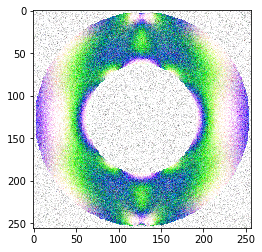

In [44]:
plt.imshow(gaussian_noise(a5, 0.15), cmap = 'gray')

In [23]:
m + ims + z + i1 + 'Img1_' + '100.bmp'

'Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Imagenes/Concord_IMX250MYR_No_correccion/Img_1/Img1_100.bmp'

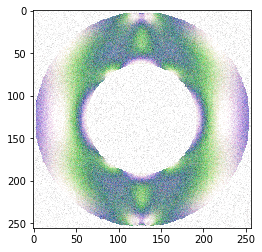

In [31]:
import random

## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
m = m2
z = c[0]

b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
b5 = np.dstack([b1, b2, b3, b4])
valor = np.amax(b5)

r1 = random.uniform(15,36)
r2 = random.uniform(15,36)
r3 = random.uniform(15,36)
r4 = random.uniform(15,36)
a1 = gaussian_noise(get_filtro(m, m + ims + z + i1 + 'Img1_' + '50.bmp'), r1)    #Imagen 1
a2 = gaussian_noise(get_filtro(m, m + ims + z + i2 + 'Img2_' + '50.bmp'), r2)    #Imagen 2
a3 = gaussian_noise(get_filtro(m, m + ims + z + i3 + 'Img3_' + '50.bmp'), r3)    #Imagen 3
a4 = gaussian_noise(get_filtro(m, m + ims + z + i4 + 'Img4_' + '50.bmp'), r4)    #Imagen 4
a5 = np.dstack([a1, a2, a3, a4])                     # Concatenación por medio de stack
a5 = a5/valor                                        # Normalización por valor máximo

plt.imshow(a5, cmap='gray')

In [32]:
#RGB
import random
for m in mm:                           #Recorrer cada uno de los 7 modelos
    for z in c:                       #Recorrer cada una de las 18 combinaciones de cámara e iluminación para cada modelo
        
        ## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
        b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
        b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
        b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
        b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
        b5 = np.dstack([b1, b2, b3, b4])
        valor = np.amax(b5)
        
        for n in range(1,101):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB
            r1 = random.uniform(15,36)                                                        #Ruido Gaussiano con std entre 15 y 36
            a1 = gaussian_noise(get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp'), r1)    #Imagen 1
            r2 = random.uniform(15,36)                                                        #Ruido Gaussiano con std entre 15 y 36
            a2 = gaussian_noise(get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp'), r2)    #Imagen 2
            r3 = random.uniform(15,36)                                                        #Ruido Gaussiano con std entre 15 y 36
            a3 = gaussian_noise(get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp'), r3)    #Imagen 3
            r4 = random.uniform(15,36)                                                        #Ruido Gaussiano con std entre 15 y 36
            a4 = gaussian_noise(get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp'), r4)    #Imagen 4
            a5 = np.dstack([a1, a2, a3, a4])                     # Concatenación por medio de stack
            a5 = a5/valor                                # Normalización por valor máximo
            np.save(m + ims + z + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M' + str(mm.index(m)+8) + '_C' + str(c.index(z)+1) +  '_' + str(100+n) + '.npy', a5) #Guardar stack
        print(m + z)

Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Concord_IMX250MYR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Concord_IMX250MZR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/DL11_IMX250MYR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/DL11_IMX250MZR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Fluorescente_IMX250MYR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Fluorescente_IMX250MZR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/LCD_IMX250MYR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/LCD_IMX250MZR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Philips_IMX250MYR_No_correccion/
Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolucion/Philips_IMX250MZR_No_correc

In [25]:
#Stokes
import random

for m in mm:                           #Recorrer cada uno de los 5 modelos
    for z in c:                       #Recorrer cada una de las 63 combinaciones de cámara e iluminación para cada modelo
        
        ## Normalización de la imagen a partir del valor máximo encontrado en el stack de mayor carga
        b1 = get_filtro(m, m + ims + z + i1 + 'Img1_' + '100.bmp')    #Imagen 1
        b2 = get_filtro(m, m + ims + z + i2 + 'Img2_' + '100.bmp')    #Imagen 2
        b3 = get_filtro(m, m + ims + z + i3 + 'Img3_' + '100.bmp')    #Imagen 3
        b4 = get_filtro(m, m + ims + z + i4 + 'Img4_' + '100.bmp')    #Imagen 4
        b5 = np.dstack([b1, b2, b3, b4])
        valor = np.amax(b5)
        
        for n in range(1, 101):        #Recorrer cada una de las 100 imágenes de cada combinación, tomando el canal G del espacio RGB
            r1 = random.uniform(15,36)                                                        #Ruido Gaussiano con std entre 15 y 36
            i90 = gaussian_noise(get_filtro(m, m + ims + z + i1 + 'Img1_' + str(n) + '.bmp'), r1)    #Imagen 1
            r2 = random.uniform(15,36)                                                        #Ruido Gaussiano con std entre 15 y 36
            i45 = gaussian_noise(get_filtro(m, m + ims + z + i2 + 'Img2_' + str(n) + '.bmp'), r2)    #Imagen 2
            r3 = random.uniform(15,36)                                                        #Ruido Gaussiano con std entre 15 y 36
            i135 = gaussian_noise(get_filtro(m, m + ims + z + i3 + 'Img3_' + str(n) + '.bmp'), r3)    #Imagen 3
            r4 = random.uniform(15,36)                                                        #Ruido Gaussiano con std entre 15 y 36
            i0 = gaussian_noise(get_filtro(m, m + ims + z + i4 + 'Img4_' + str(n) + '.bmp'), r4)    #Imagen 4
            s0 = 0.5*(i0 + i90 + i45 + i135)
            s1 = i0 - i90
            s2 = i45 - i135
            s = np.dstack([s0, s1, s2])                     # Concatenación por medio de stack
            s = s/valor                                # Normalización por valor máximo
            np.save(m + ims + z + 'Stokes/' + 'Stokes_M' + str(mm.index(m)+1) + '_C' + str(c.index(z)+1) +  '_' + str(100+n) + '.npy', s) #Guardar stack
        print(m + z)

Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Concord_IMX250MYR_No_correccion/
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Concord_IMX250MZR_No_correccion/
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/DL11_IMX250MYR_No_correccion/
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/DL11_IMX250MZR_No_correccion/
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Fluorescente_IMX250MYR_No_correccion/
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Fluorescente_IMX250MZR_No_correccion/
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/LCD_IMX250MYR_No_correccion/
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/LCD_IMX250MZR_No_correccion/
Coleccion/Disco_compresion__Carga_Lineal_3500N__100_frames__256_Resolucion/Philips_IMX250MYR_No_correccion/
Coleccion/Disco_compresion__Carg

Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Fluorescente_IMX250MZR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/LCD_IMX250MYR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/LCD_IMX250MZR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Philips_IMX250MYR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Philips_IMX250MZR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/RXD2_IMX250MYR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/RXD2_IMX250MZR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Sylvania_IMX250MYR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/Sylvania_IMX250MZR_No_correccion/
Coleccion/Viga_puntual__Carga_Lineal_3000N__100_frames__256_Resolucion/

### Validación de generación correcta de imágenes

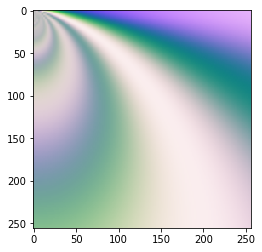

In [27]:
m = m8
im = np.load(m + ims + c[1] + 'FilteredStack1234Aug/' + 'FilteredStack1234Aug_M8' + '_C2' + '_' + str(500) + '.npy')
plt.imshow(im, cmap='gray')

In [10]:
m6

'Coleccion/Estructura_Vertical__Carga_Lineal_7000N__100_frames__256_Resolucion/'

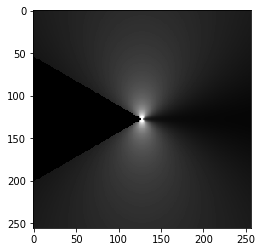

In [36]:
phase100 = np.loadtxt(m8 + 'PNA8/PN_200.txt')
plt.imshow(phase100, cmap='gray')

In [15]:
m8

'Coleccion/Muesca__Carga_Lineal_3000000N__100_frames__256_Resolución/'